In [1]:
import warnings
warnings.simplefilter('ignore')

import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

# Reduccion del tamaño de la red

**imdb**

## Data

In [2]:
from keras.datasets import imdb
import numpy as np

np_load_old = np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# se cargan los datos
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

np.load = np_load_old

Using TensorFlow backend.


In [3]:
word_index = imdb.get_word_index()

reverse_word_index = dict(
     [(value, key) for (key, value) in word_index.items()])

decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [4]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
          results[i, sequence] = 1.  # indice a uno
    return results

In [5]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [6]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [7]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

## Modelo Original

In [8]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

## Modelo con menor capacidad

In [9]:
model2 = models.Sequential()
model2.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model2.add(layers.Dense(4, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

model2.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

## Comparacion

In [10]:
epochs=20

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(x_val, y_val), 
                    verbose=0)

history_dict = history.history

In [11]:
history2 = model2.fit(partial_x_train,
                      partial_y_train,
                      epochs=epochs,
                      batch_size=512,
                      validation_data=(x_val, y_val), 
                      verbose=0)

history2_dict = history2.history

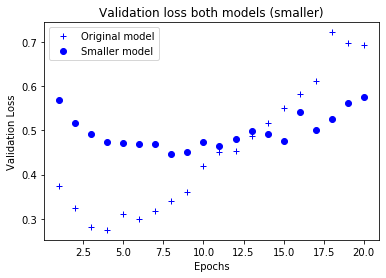

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline 

val_loss_values = history_dict['val_loss']
val_loss_values2 = history2_dict['val_loss']

epochs = range(1, epochs + 1)

plt.plot(epochs, val_loss_values, 'b+', label='Original model')
plt.plot(epochs, val_loss_values2, 'bo', label='Smaller model')

plt.title('Validation loss both models (smaller)')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()

plt.show();

## Modelo con mayor capacidad, comparacion

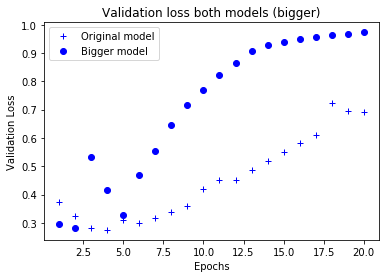

In [13]:
model3 = models.Sequential()
model3.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
model3.add(layers.Dense(512, activation='relu'))
model3.add(layers.Dense(1, activation='sigmoid'))

model3.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])



history3 = model3.fit(partial_x_train,
                      partial_y_train,
                      epochs=20,
                      batch_size=512,
                      validation_data=(x_val, y_val), 
                      verbose=0)

history3_dict = history3.history



val_loss_values3 = history3_dict['val_loss']

plt.plot(epochs, val_loss_values, 'b+', label='Original model')
plt.plot(epochs, val_loss_values3, 'bo', label='Bigger model')

plt.title('Validation loss both models (bigger)')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()

plt.show();

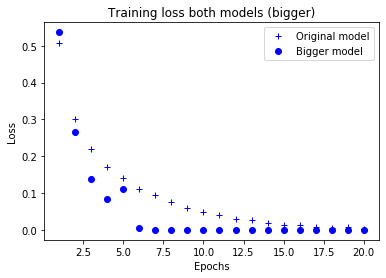

In [14]:
loss_values = history_dict['loss']
loss_values3 = history3_dict['loss']

plt.plot(epochs, loss_values, 'b+', label='Original model')
plt.plot(epochs, loss_values3, 'bo', label='Bigger model')

plt.title('Training loss both models (bigger)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show();

# Regularizacion

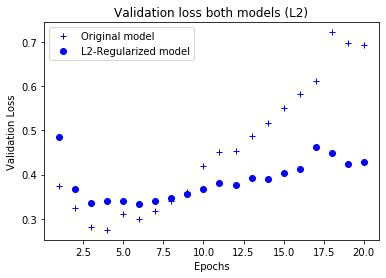

In [15]:
# se añade regularizacion L2

from keras import regularizers


model_l2 = models.Sequential()
model_l2.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                       activation='relu', input_shape=(10000,))) 
model_l2.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                       activation='relu'))
model_l2.add(layers.Dense(1, activation='sigmoid'))

model_l2.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])



history_l2 = model_l2.fit(partial_x_train,
                      partial_y_train,
                      epochs=20,
                      batch_size=512,
                      validation_data=(x_val, y_val), 
                      verbose=0)

history_l2_dict = history_l2.history



val_loss_values_l2 = history_l2_dict['val_loss']

plt.plot(epochs, val_loss_values, 'b+', label='Original model')
plt.plot(epochs, val_loss_values_l2, 'bo', label='L2-Regularized model')

plt.title('Validation loss both models (L2)')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()

plt.show();

In [16]:
#regularizers.l1(0.001)  # L1
#regularizers.l1_l2(l1=0.001, l2=0.001)   # ElasticNet

# DropOut

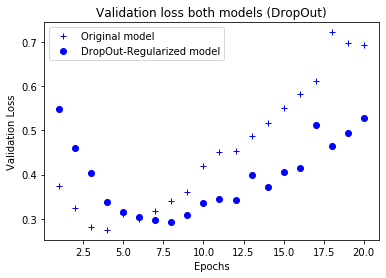

In [17]:
model_do = models.Sequential()
model_do.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model_do.add(layers.Dropout(0.5))
model_do.add(layers.Dense(16, activation='relu'))
model_do.add(layers.Dropout(0.5))
model_do.add(layers.Dense(1, activation='sigmoid'))

model_do.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])



history_do = model_do.fit(partial_x_train,
                      partial_y_train,
                      epochs=20,
                      batch_size=512,
                      validation_data=(x_val, y_val), 
                      verbose=0)

history_do_dict = history_do.history



val_loss_values_do = history_do_dict['val_loss']

plt.plot(epochs, val_loss_values, 'b+', label='Original model')
plt.plot(epochs, val_loss_values_do, 'bo', label='DropOut-Regularized model')

plt.title('Validation loss both models (DropOut)')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()

plt.show();